# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


In [5]:
print(cities[6])

selfoss


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
#units = "metric"

# Build partial query URL
query_url = f"{url}?units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | moundou
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | selfoss
Processing Record 8 of Set 1 | saudarkrokur
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | pont-l'abbe
City not found. Skipping...
Processing Record 17 of Set 1 | port saint john's
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | northam
Processing Record 20 of Set 1 | gadzhiyevo
Processing Record 21 of Set 1 | grytviken
Processi

In [18]:
print(len(city_data))

556


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,5.43,94,0,2.06,GB,1699228719
1,moundou,8.5667,16.0833,23.81,73,51,1.84,TD,1699229254
2,bredasdorp,-34.5322,20.0403,14.57,92,55,0.89,ZA,1699228719
3,pisco,-13.7000,-76.2167,20.03,77,0,8.23,PE,1699228900
4,adamstown,-25.0660,-130.1015,22.74,77,100,7.11,PN,1699228719


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

#convert date time
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime("%Y-%m-%d")
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,5.43,94,0,2.06,GB,2023-11-05
1,moundou,8.5667,16.0833,23.81,73,51,1.84,TD,2023-11-06
2,bredasdorp,-34.5322,20.0403,14.57,92,55,0.89,ZA,2023-11-05
3,pisco,-13.7000,-76.2167,20.03,77,0,8.23,PE,2023-11-06
4,adamstown,-25.0660,-130.1015,22.74,77,100,7.11,PN,2023-11-05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

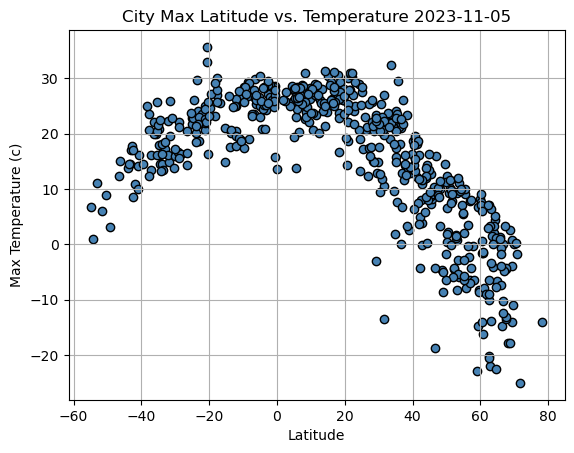

<Figure size 640x480 with 0 Axes>

In [40]:
# Build scatter plot for latitude vs. temperature

plt.title(f"City Max Latitude vs. Temperature {city_data_df['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True, linestyle='-', alpha=1)
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", color="steelblue", edgecolors="black")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

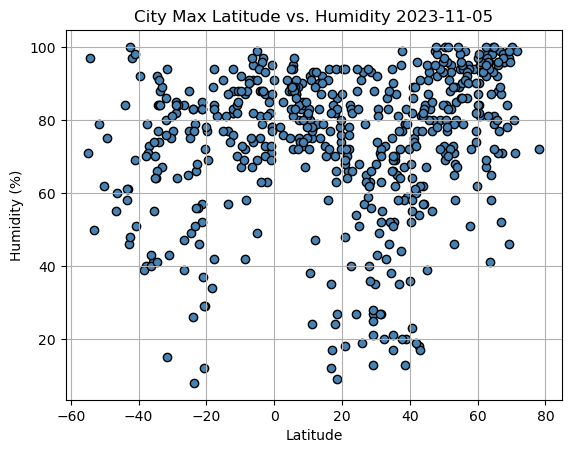

<Figure size 640x480 with 0 Axes>

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.title(f"City Max Latitude vs. Humidity {city_data_df['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, linestyle='-', alpha=1)
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", color="steelblue", edgecolors="black")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

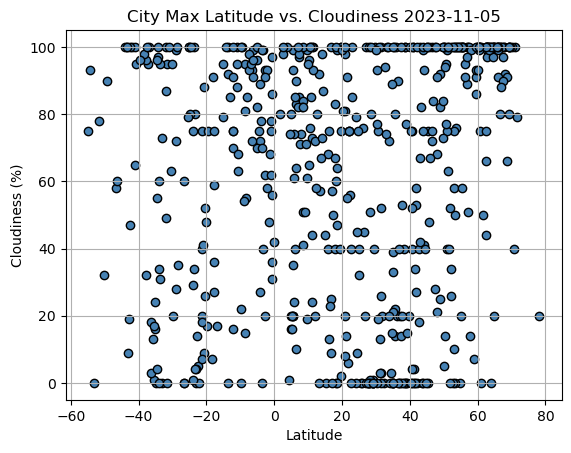

<Figure size 640x480 with 0 Axes>

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.title(f"City Max Latitude vs. Cloudiness {city_data_df['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, linestyle='-', alpha=1)
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", color="steelblue", edgecolors="black")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

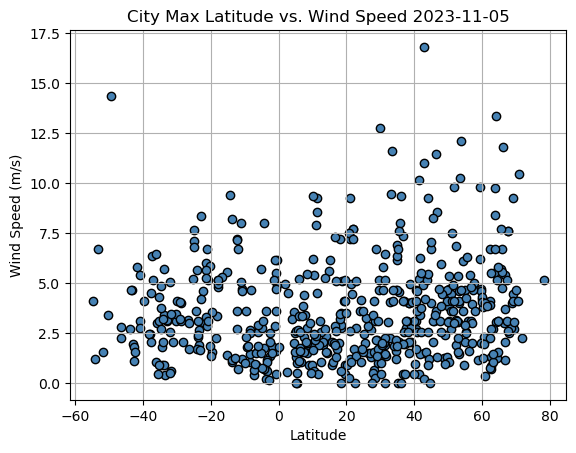

<Figure size 640x480 with 0 Axes>

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.title(f"City Max Latitude vs. Wind Speed {city_data_df['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True, linestyle='-', alpha=1)
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", color="steelblue", edgecolors="black")
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE